In [1]:
# for creating a responsive plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl

import uproot
import torch
from torch_geometric.nn import GraphSAGE

import VisualisationFileHelper
import GraphBuilder
import Models 
from HigherTier import HigherTierFileHelper

In [2]:
from termcolor import colored, cprint

# Colour Dictionaries
pdgColours_text = {13 : 'blue', 11 : 'red', 2212 : 'green', 211 : 'magenta', 22 : 'yellow'}
pdgColours_graph = {13 : 'blue', 11 : 'red', 2212 : 'green', 211 : 'pink', 22 : 'tab:orange'}
hierarchyColours = {1 : 'black', 2 : 'red', 3 : 'blue', 4: 'g'}

In [12]:
# Target event info

fileName = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/handScan/event89.root'

treeFile = uproot.open(fileName)
tree = treeFile['ccnuselection/ccnusel']
branches = tree.arrays()

run = np.array(branches['Run'][0])
subrun = np.array(branches['SubRun'][0])
event = np.array(branches['Event'][0])

In [13]:
run = branches['Run'][0]
subrun = branches['SubRun'][0]
event = branches['Event'][0]

recoNuX = branches['RecoNuVtxX'][0]
recoNuY = branches['RecoNuVtxY'][0]
recoNuZ = branches['RecoNuVtxZ'][0]

pfpTruePDG = np.array(branches['RecoPFPTruePDG'][0])
pfpSelf = np.array(branches['RecoPFPSelf'][0])
pfpRecoVertexX = np.array(branches['RecoPFPRecoVertexX'][0])
pfpRecoVertexY = np.array(branches['RecoPFPRecoVertexY'][0])
pfpRecoVertexZ = np.array(branches['RecoPFPRecoVertexZ'][0])
pfpSpacepointX = branches['RecoPFPSpacepointX'][0]
pfpSpacepointY = branches['RecoPFPSpacepointY'][0]
pfpSpacepointZ = branches['RecoPFPSpacepointZ'][0]

pfpTrueTrackID = np.array(branches['RecoPFPTrueTrackID'][0])
pfpTrueVisibleGeneration = np.array(branches['RecoPFPTrueVisibleGeneration'][0])
pfpTrueVisibleParentTrackID = np.array(branches['RecoPFPTrueVisibleParentTrackID'][0])
trueVisibleParentPFPIndex = np.array(branches['RecoPFPTrueVisibleParentPFPIndex'][0])

nParticles = pfpTruePDG.shape[0]

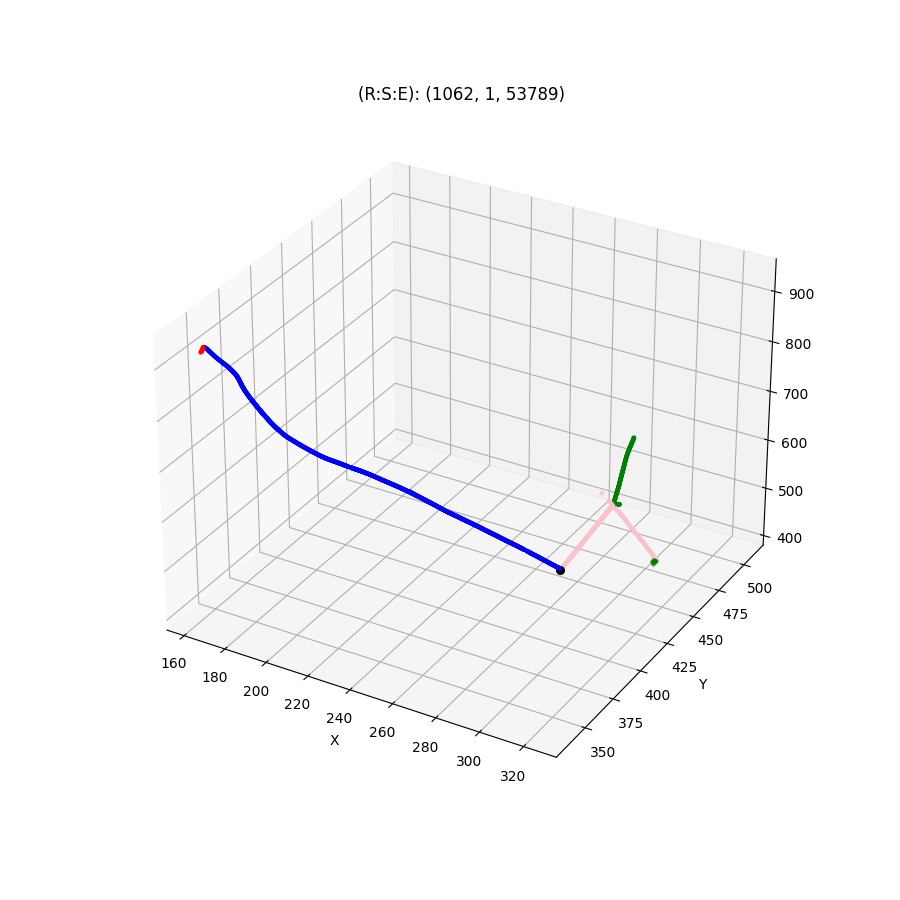

In [14]:
#########################################
# Visualise true hierarchy
#########################################

fig_true = plt.figure(figsize=(9,9))
ax_true = plt.axes(projection='3d')

ax_true.scatter(recoNuX, recoNuY, recoNuZ, color = "black", s = 30.0)
plt.title('(R:S:E): (' + str(run) + ", " + str(subrun) + ", " + str(event) + ")")
plt.xlabel('X')
plt.ylabel('Y')

for iParticle in range(nParticles) : 

    if (np.array(pfpSpacepointX[iParticle]).shape[0] == 0) :
        continue
    
    #if ((abs(pfpTruePDG[iParticle]) == 211)) :
     #   continue
        
    #if ((abs(pfpTruePDG[iParticle]) == 13)) :
     #   continue
    
    x = np.array(pfpSpacepointX[iParticle])    
    y = np.array(pfpSpacepointY[iParticle])
    z = np.array(pfpSpacepointZ[iParticle])
            
    vertexX = pfpRecoVertexX[iParticle]
    vertexY = pfpRecoVertexY[iParticle]
    vertexZ = pfpRecoVertexZ[iParticle]
    
    ax_true.scatter(x, y, z, color = pdgColours_graph.get(abs(pfpTruePDG[iParticle]), 'tab:gray'), s = 5.0, alpha = 0.5)

# show plot
plt.show()


In [6]:
print('pfpTrueTrackID:', pfpTrueTrackID)
print('pfpTrueVisibleGeneration:', pfpTrueVisibleGeneration)
print('pfpTrueVisibleParentTrackID:', pfpTrueVisibleParentTrackID)
print('trueVisibleParentPFPIndex:', trueVisibleParentPFPIndex)

pfpTrueTrackID: [ 5  5 79]
pfpTrueVisibleGeneration: [2 3 4]
pfpTrueVisibleParentTrackID: [0 5 5]
trueVisibleParentPFPIndex: [-1  0  1]


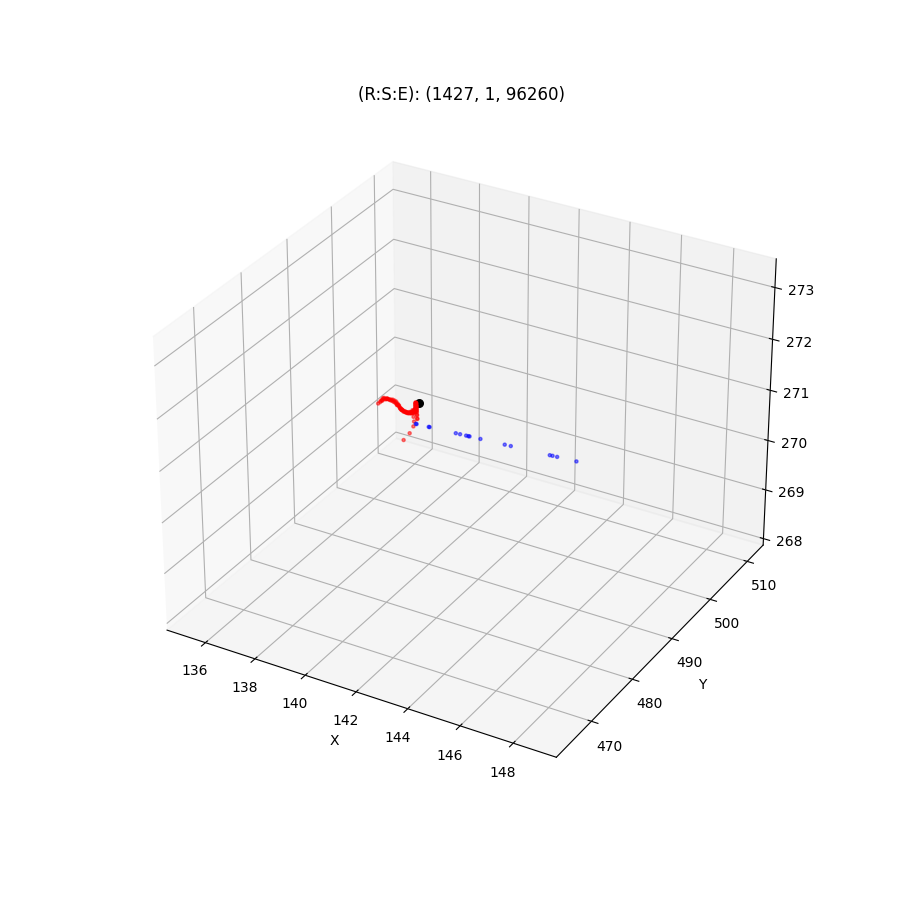

In [8]:
#########################################
# Visualise true hierarchy
#########################################

fig_true = plt.figure(figsize=(9,9))
ax_true = plt.axes(projection='3d')

ax_true.scatter(recoNuX, recoNuY, recoNuZ, color = "black", s = 30.0)
plt.title('(R:S:E): (' + str(run) + ", " + str(subrun) + ", " + str(event) + ")")
plt.xlabel('X')
plt.ylabel('Y')

for iParticle in range(nParticles) : 

    if (np.array(pfpSpacepointX[iParticle]).shape[0] == 0) :
        continue
                
    x = np.array(pfpSpacepointX[iParticle])    
    y = np.array(pfpSpacepointY[iParticle])
    z = np.array(pfpSpacepointZ[iParticle])
            
    vertexX = pfpRecoVertexX[iParticle]
    vertexY = pfpRecoVertexY[iParticle]
    vertexZ = pfpRecoVertexZ[iParticle]
    
#     if (pfpTrueTrackID[iParticle] == 1) :
#         print('yo')
#         ax_true.scatter(x, y, z, color = 'g', s = 5.0, alpha = 0.5)
#     else :
#         ax_true.scatter(x, y, z, color = 'r', s = 5.0, alpha = 0.5)
      
#     continue
        
    if (iParticle == 1) :
        ax_true.scatter(x, y, z, color = 'r', s = 5.0, alpha = 0.5)
        
    if (iParticle == 2) :
        ax_true.scatter(x, y, z, color = 'b', s = 5.0, alpha = 0.5)
        
#     if (pfpTrueTrackID[iParticle] != 1) :
#         continue  
#     else :
        
#         if (iParticle == 0) :
#             ax_true.scatter(x, y, z, color = 'b', s = 5.0, alpha = 0.5)
#         if (iParticle == 9) :
#             ax_true.scatter(x, y, z, color = 'black', s = 5.0, alpha = 0.5)

# show plot
plt.show()
